In [292]:
import fastf1 as ff1
import pandas as pd
import numpy as np
from numpy import nan
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

In [293]:
# Enable the cache
ff1.Cache.enable_cache('cache')

In [294]:
ff1.plotting.setup_mpl()

In [295]:
session = ff1.get_session(2022, 'Yas Island', 'FP2')

In [296]:
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [297]:
leclerc_data = session.laps.pick_driver('LEC').pick_fastest().get_telemetry()
lec_times = (leclerc_data['Time'] / np.timedelta64(1, 's')).astype(int)
lec_speeds = leclerc_data['Speed']

In [298]:
import math
raw_acceleration_data = []
for i in range(0, lec_times.size):
    
    s_p = lec_speeds.iloc[i-1]
    s_f = lec_speeds.iloc[i]
    t_p = lec_times.iloc[i-1]
    t_f = lec_times.iloc[i]
    
    """
    print("------------------")
    print(i) 
    print("------------------")
    print("Velocita precedente", s_p)
    print("\nVelocita finale", s_f)
    print("\nTempo precendete", t_p)
    print("\nTempo finale", t_f)
    print("-------------------")
    """    
    
    acc = ((s_f - s_p) / 3.6) / (t_f - t_p)  
    raw_acceleration_data.append(acc)
    
    acceleration = [v for v in raw_acceleration_data if not(math.isinf(v) or math.isnan(v))]

C:\Users\massi\AppData\Local\Temp\ipykernel_22672\3744943100.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  acc = ((s_f - s_p) / 3.6) / (t_f - t_p)
C:\Users\massi\AppData\Local\Temp\ipykernel_22672\3744943100.py:21: RuntimeWarning: invalid value encountered in double_scalars
  acc = ((s_f - s_p) / 3.6) / (t_f - t_p)


In [299]:
sum = 0
for i in acceleration:
    print("Index: ", sum , "-", "Value: ", i)
    sum += 1

Index:  0 - Value:  -0.013071895424836602
Index:  1 - Value:  0.8333333333333333
Index:  2 - Value:  0.2777777777777778
Index:  3 - Value:  0.2777777777777778
Index:  4 - Value:  -2.5
Index:  5 - Value:  -1.9444444444444444
Index:  6 - Value:  -1.1111111111111112
Index:  7 - Value:  1.9444444444444444
Index:  8 - Value:  0.5555555555555556
Index:  9 - Value:  1.1111111111111112
Index:  10 - Value:  0.0
Index:  11 - Value:  0.0
Index:  12 - Value:  0.0
Index:  13 - Value:  0.5555555555555556
Index:  14 - Value:  0.0
Index:  15 - Value:  0.5555555555555556
Index:  16 - Value:  0.0
Index:  17 - Value:  0.2777777777777778
Index:  18 - Value:  0.0
Index:  19 - Value:  0.0
Index:  20 - Value:  -5.833333333333333
Index:  21 - Value:  -1.6666666666666665
Index:  22 - Value:  0.2777777777777778
Index:  23 - Value:  0.8333333333333333
Index:  24 - Value:  2.7777777777777777
Index:  25 - Value:  2.7777777777777777
Index:  26 - Value:  1.6666666666666665
Index:  27 - Value:  0.5555555555555556
Ind

Text(0, 0.5, 'Long Acc')

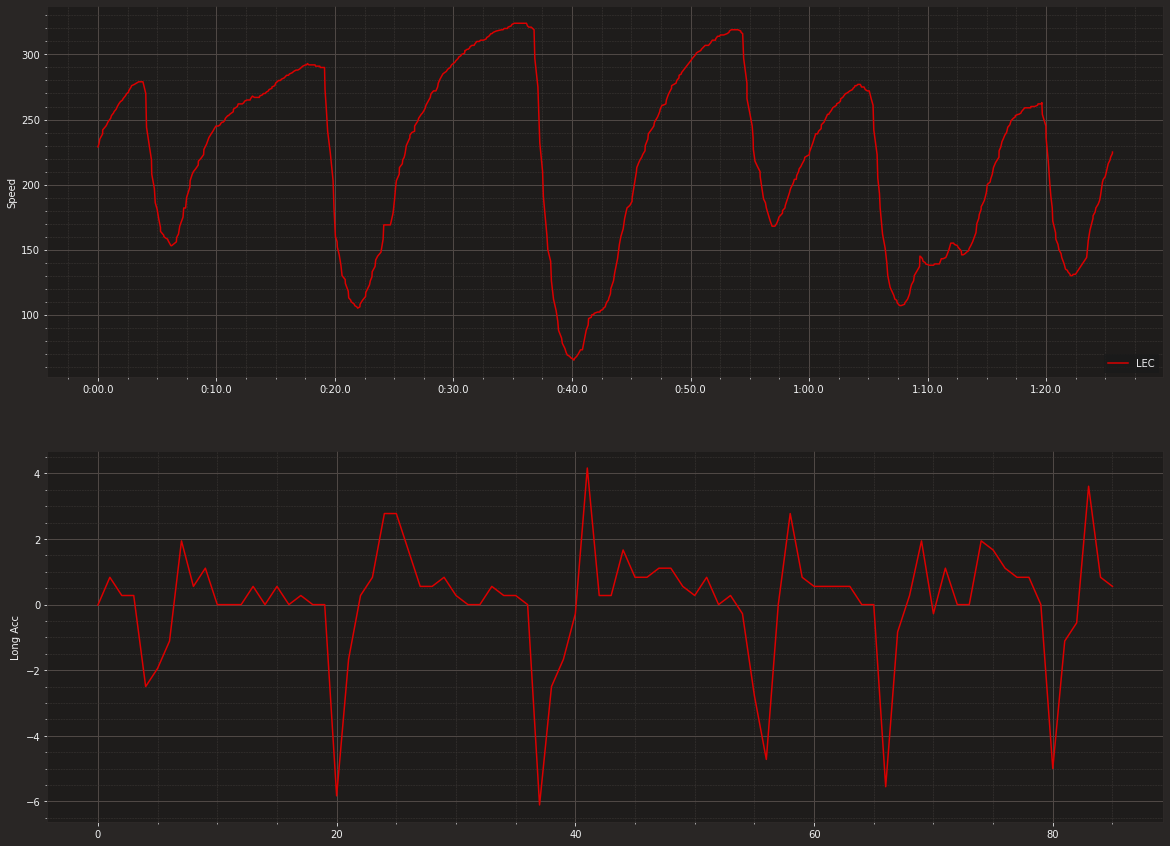

In [302]:
# Team color
team_driver = session.laps.pick_driver("LEC")['Team'].iloc[0]
color = ff1.plotting.team_color(team_driver)

# Plot
plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots(2, gridspec_kw={'height_ratios': [5,5]})

# Subplot 1: Speed
ax[0].plot(leclerc_data['Time'], leclerc_data['Speed'], label = "LEC", color = color)
ax[0].set(ylabel = "Speed")
ax[0].legend(loc = "lower right")

# Subplot 2: Longitudinal Acceleration
ax[1].plot(acceleration, label = "LEC", color = color)
ax[1].set_ylabel("Long Acc")